In [1]:
import numpy as np
import tensorflow as tf
from models import FINE
import matplotlib.pyplot as plt

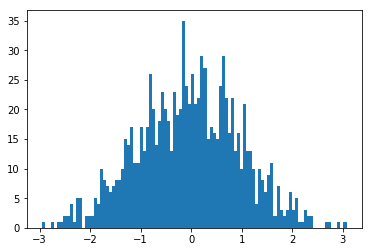

Fisher information contained in a single variate X about mu is 1.


In [2]:
# generate data
variates = np.random.normal(0, 1.0, size=1000)

# plot variates
fig, ax = plt.subplots()
ax.hist(variates, bins=100)
plt.show()

print('Fisher information contained in a single variate X about mu is 1.')

In [3]:
n_fine = 0

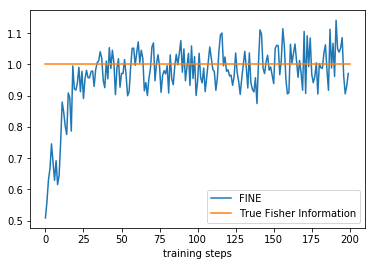

In [4]:


# parameters
n_samples = 10000
n_epochs = 200
d_theta = 0.5

# prepare the input placeholders
x_theta = tf.placeholder(tf.float32, shape=(n_samples, 1), name='x_theta')
x_theta_prime = tf.placeholder(tf.float32, shape=(n_samples, 1), name='x_theta_prime')

# make the FI and optimisation graphs
n_fine+=1
FI, opt = FINE(x_theta, x_theta_prime, d_theta, name='FINE'+str(n_fine))

# start the session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

FIs = []
for i in range(n_epochs):
    
    # generate new samples
    x_th = np.random.normal(0, 1.0, size=(n_samples, 1))
    x_thp = np.random.normal(d_theta, 1.0, size=(n_samples, 1))
    
    # training step
    feed_dict = {x_theta:x_th, x_theta_prime:x_thp}
    fi, _ = sess.run([FI, opt], feed_dict=feed_dict)
    
    # append
    FIs.append(fi)
    
fig, ax = plt.subplots()
ax.plot(range(len(FIs)), FIs, label='FINE')
ax.plot([0, len(FIs)], [1,1], label='True Fisher Information')
ax.set_xlabel('training steps')
ax.legend(loc='best')
#fig.savefig('FINE.png')
plt.show()
    
    